# Import Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import os

# path to datasets
PATH = 'C:\GitHub\pythonPrograms\machineLearningModels2023\datasets'

# Load data

In [4]:
# Load King County housing data
# https://www.kaggle.com/harlfoxem/housesalesprediction

housing_df = pd.read_csv(os.path.join(PATH,'kc_house_data.csv'))

In [5]:
# Look at last n number of observations of the dataset
housing_df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


# Histogram plots

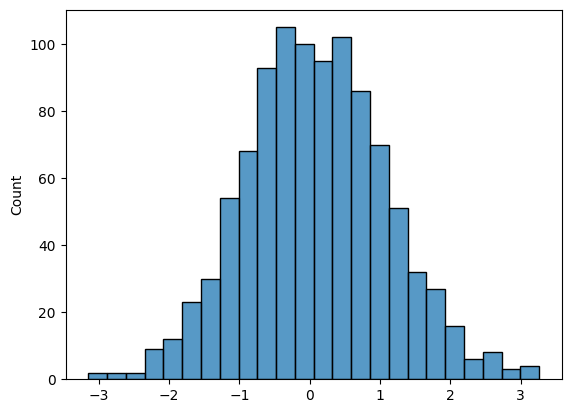

In [29]:
# Create a normal sample with n observations and plot a histogram of the sample
x = np.random.normal(size=1000)
_ = sns.histplot(x)

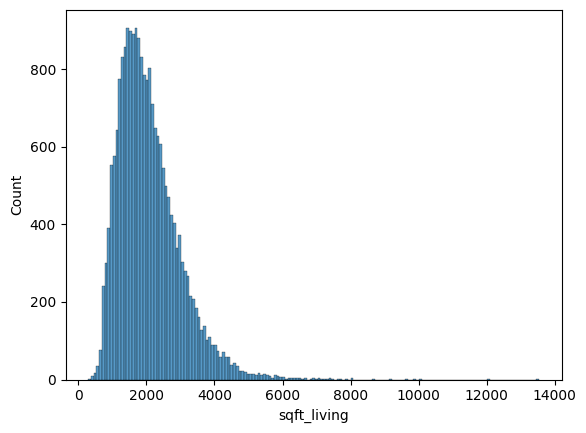

In [30]:
# Compare the original, normal sample with the histogram of square feet of living space from our housing dataframe
price_plot = sns.histplot(housing_df['sqft_living'])

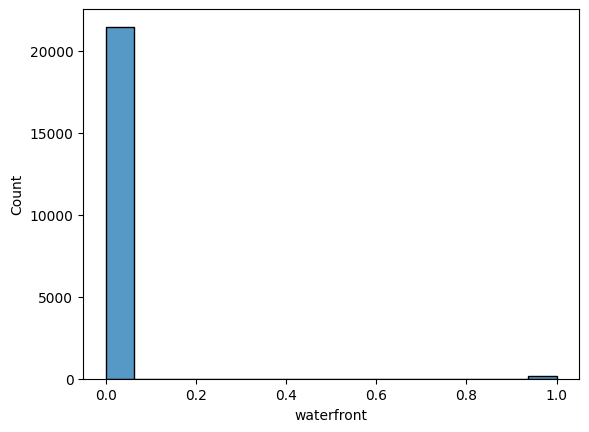

In [31]:
# Compare the original, normal sample with the histogram of a boolean variable like waterfront from our housing dataframe
_ = sns.histplot(housing_df['waterfront'])

In [32]:
# Notice why the plot appears as above
housing_df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

# Normality tests
## Why do we care? 
"A large fraction of the field of statistics is concerned with data that assumes that it was drawn from a Gaussian distribution."

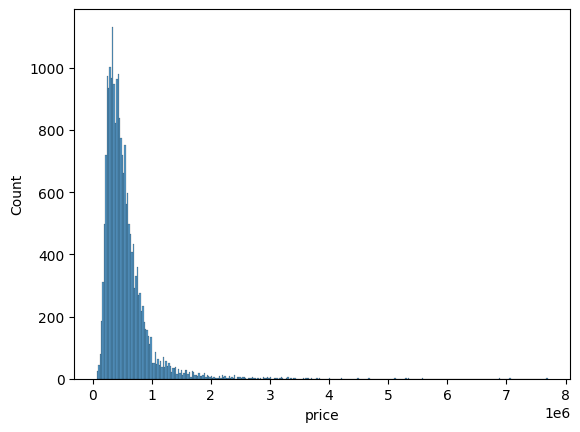

In [33]:
# Compare the original, normal sample with the histogram of square feet of living space from our housing dataframe
price_plot = sns.histplot(housing_df['price'])

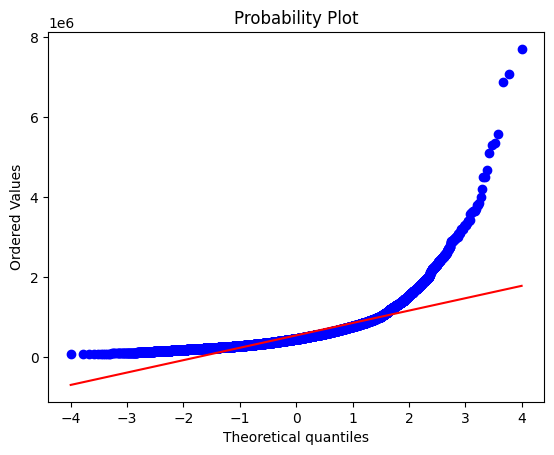

In [11]:
# QQ plot showing left skew and non-normality of very high priced houses (long right tail)
_ = stats.probplot(housing_df['price'], plot=sns.mpl.pyplot)

In [12]:
# Shapiro-Wilk test of normality
# Code source: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
from scipy.stats import shapiro

# normality test
stat, p = shapiro(housing_df['price'])
print('Statistics=%.3f, p=%.5f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.712, p=0.00000
Sample does not look Gaussian (reject H0)


/Users/cmedina/miniforge3/envs/ml/lib/python3.9/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [34]:
# D’Agostino’s K^2 test of normality
# Code source: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
from scipy.stats import normaltest

# normality test
stat, p = normaltest(housing_df['price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=19121.789, p=0.000
Sample does not look Gaussian (reject H0)


In [35]:
# Anderson-Darling test of normality
# Code source: https://machinelearningmastery.cofm/a-gentle-introduction-to-normality-tests-in-python/
from scipy.stats import anderson

# normality test
result = anderson(housing_df['price'])
print('Statistic: %.3f' % result.statistic)
p = 0

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('Alpha = %.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 1192.088
Alpha = 15.000: 0.576, data does not look normal (reject H0)
Alpha = 10.000: 0.656, data does not look normal (reject H0)
Alpha = 5.000: 0.787, data does not look normal (reject H0)
Alpha = 2.500: 0.918, data does not look normal (reject H0)
Alpha = 1.000: 1.092, data does not look normal (reject H0)


# Handling missing data

In [3]:
# Load data and find missing values
# https://www.kaggle.com/mihirchate95/handling-missing-values/data

PATH ='C:\GitHub\pythonPrograms\machineLearningModels2023\datasets\Housing_Prices_Competition'
missing_df = pd.read_csv(os.path.join(PATH,'train.csv'))
missing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
missing_df.apply(lambda x: x.count(), axis=0)

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [5]:
# Make sure the feature shape looks correct
missing_df['MiscFeature'].shape

(1460,)

In [6]:
# Explore value counts of feature with missing values -- the rest are missing values
missing_df['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [7]:
# Categorical binning to handle missing values
def missing_to_categorical(x):
    if  x['MiscFeature'] is np.nan:
        return 'No_Misc_Features'
    else:
        return x['MiscFeature']

missing_df['MiscFeatureCategory'] = missing_df.apply(lambda x: missing_to_categorical(x), axis=1)

In [8]:
# Now, we've converted the missing values to another categorical level
missing_df['MiscFeatureCategory'].value_counts()

No_Misc_Features    1406
Shed                  49
Gar2                   2
Othr                   2
TenC                   1
Name: MiscFeatureCategory, dtype: int64

In [9]:
# Check the current median and how many observations currently have that value

print(missing_df['LotFrontage'].median())
missing_df['LotFrontage'].loc[missing_df['LotFrontage'] == 69.0].count()

69.0


11

In [25]:
# Data imputation using median -- the na's have been replaced with the median value

missing_df['LotFrontage'].fillna(missing_df['LotFrontage'].median(), inplace=True)
missing_df['LotFrontage'].loc[missing_df['LotFrontage'] == 69.0].count()

270

In [26]:
# Load data and find missing values

counts = missing_df.apply(lambda x: x.count(), axis=0)
counts.loc[counts.apply(lambda x: x < 1460)]

Alley             91
MasVnrType      1452
MasVnrArea      1452
BsmtQual        1423
BsmtCond        1423
BsmtExposure    1422
BsmtFinType1    1423
BsmtFinType2    1422
Electrical      1459
FireplaceQu      770
GarageType      1379
GarageYrBlt     1379
GarageFinish    1379
GarageQual      1379
GarageCond      1379
PoolQC             7
Fence            281
MiscFeature       54
dtype: int64